In [57]:
%matplotlib inline
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Focus questions

Goals for student knowledge at the end of the lesson:

1. Give examples of situations where the following distributions are an appropriate model for observed data:
    - Poission
    - Weibull
    - log-normal
2. Describe a situation where the central limit theorem can be applied to use statistics based on normal distributions, when population being sampled is non-normal.

## Review

#### Measurement types
- Ordinal: Hurricane scale
- Nominal: species classification
- Scale
  - Interval: Zero point is arbitrarily defined
  - Ratio: Variables with a natural zero point, Kelvin scale, length, mass

#### Error types
- Measurement Errors
  - Systematic - Instrument Drift
  - Random
- Computational errors:
     - Numerical errors: Approximations with limited computational resources
     - Round-off, truncation
     - Data errors: garbage in - garbage out
     - Errors from previous computations
     - Modeling errors


## Probability Density functions

__Probability Functions__

$P(x)$ = probability mass function (for discrete data)

_Example:_ The probability an number $x$ coming up on a dice role. The PMF is plotted as vertical lines because the probability of rolling a non-integer (e.g. 3.5) is equal to zero.
 

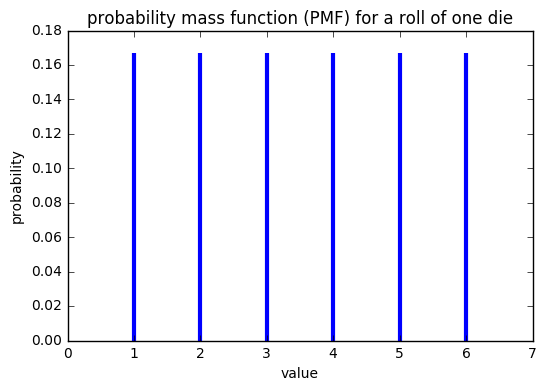

In [58]:
# generate a uniform distribution
# see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html#scipy.stats.randint
low = 1
high = 7
rv = stats.randint(low, high)

# plot the probability mass function
x = np.arange(low,high)
plt.vlines(x, 0, rv.pmf(x), colors='b', linestyles='-', lw=3)
plt.xlim(0,7)
plt.title('probability mass function (PMF) for a roll of one die')
plt.xlabel('value')
plt.ylabel('probability')

$F(x)$ = cumulative distribution function

The cumulative distribution is the probability of occurrence of a value of $x$ or lower. For the example of one die roll, the CDF is a step function.

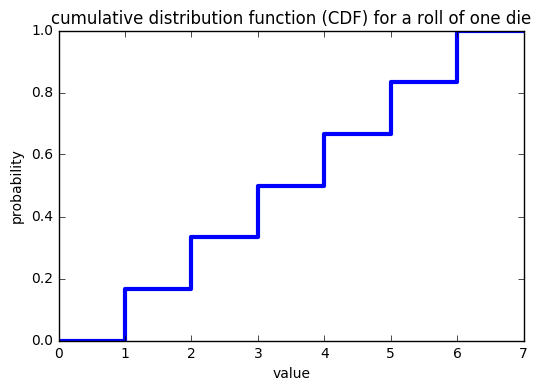

In [59]:
# make a step function from points, function adapted from http://stackoverflow.com/a/41185239
def get_x_y_steps(x, y, where="post"):
    zipxx = list(zip(x, x))
    zipyy = list(zip(y, y))
    if where == "post":
        x_step = [x[0]] + [_x for tup in zipxx[1:] for _x in tup]
        y_step = [_y for tup in zipyy[:-1] for _y in tup] + [y[-1]]
    elif where == "pre":
        x_step = [_x for tup in zipxx[:-1] for _x in tup] + [x[-1]]
        y_step = [y[0]] + [_y for tup in zipyy[1:] for _y in tup]
    return x_step, y_step

# create step function for CDF
xcdf = np.hstack([0,x,x[-1]+1])
ycdf = np.hstack([0,rv.cdf(x),1])
(x_step,y_step) = get_x_y_steps(xcdf,ycdf)

# plot CDF
plt.plot(x_step, y_step,lw=3)
plt.xlim(0,7)
plt.ylim(0,1)
plt.title('cumulative distribution function (CDF) for a roll of one die')
plt.xlabel('value')
plt.ylabel('probability')

__Mutiplication Principle__ - If two events $A$ and $B$ are unrelated, the probability of joint occurrence $P(A,B)$, i.e. both events happening, is multiplication of two probabilities,

$P(A,B)  = p(B)p(A)$.

This is a simplification of __Bayes' theorem__ for the special case where events are independent. In the more general case where the probability of events are not independent, 

$P(A,B) = p(A|B)p(B)$,

where $p(A|B)$ is the probability of $A$ occuring, given that $B$ has already occurred. In this case, the two events depend on each other, which is not the case for dice.

__Additive principle__ - Probability of one event or another mutually exclusive event is the sum of the probabilities <br>
$P(A|B) = P(C) + P(D)$

## Distributions

### Normal Distribution

<img src="images/norm_dist_rule.png" width="450">
[Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution#/media/File:Empirical_Rule.PNG)


* __Mean__ - 1st moment
* __Variance__ - 2nd moment
* __Skew__ - 3rd moment, Describes the spread (Normal Distribution, skew = 0)
* __Kurtosis__ - 4th moment, Describes how pointy the distribution is. Low value would be flat (compared to a Normal distribution (k=3))

### Non-normal distribution 
__Example: Life expectancy__<br>
<div style="float: left;" width ="1000">
    <img src="images/life_expectancy_1.png" style="float: left;" width="50%"><img src="images/life_expectancy_2.png" width="50%" style="float: right;">
</div>
source: http://www.cureffi.org/2013/06/19/how-censoring-by-life-expectancy-affects-age-of-onset-distributions/
Negative skew towards later life (spike at birth)

__Poisson Distribution__
  * Often used as a model for count data
  * Assumptions:
    * One event does not affect the probability of the next (they are independent)
    * Events cannot occur in the same time and place in the interval
    * Events occur at a constant rate<br>

    k = # of events counted per interval (ie floods per century)<br>
    $\lambda$ = expected values, true mean
    
     P(k events per interval) = $ \lambda e^{-\lambda} /k! $

    Count uncertainty  = $\sqrt{k}$ - More counts => less uncertainty

__example__: if on average 10 flood occur per century. What is probability of counting 15 floods occuring in a centry?

Probability of 15 floods in a century: 0.03475408547625957


/Users/tomconnolly/programs/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in power


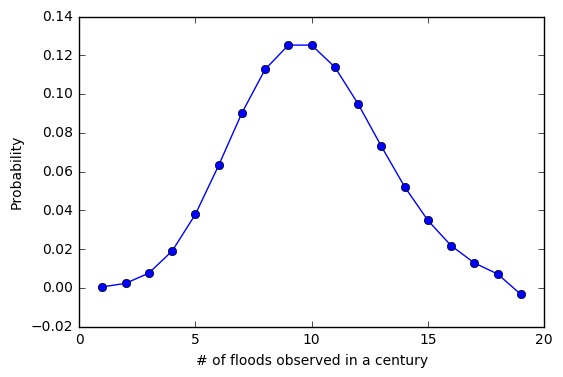

In [60]:
# Poisson Distribution

e = 2.718 #Eulers number approximation
k = 15 # number floods in a century that we we want to estumate
lam = 10 # The mean number of floods in a century counted
prob_15 = (10**15 * e**(-1*lam)) / math.factorial(k)
print("Probability of 15 floods in a century:",prob_15)

# Modeling
x = np.arange(1,20,1) # A range of possible floods
vec_fac = np.vectorize(math.factorial) # function doesn't natively accept numpy arrays
p = (10**x * e**(-lam)) / vec_fac(x)

# Plotting the model
fig, ax = plt.subplots()
ax.plot(x,p,marker='o')
ax.set_xlim(0,20)
ax.set_ylabel('Probability')
ax.set_xlabel('# of floods observed in a century')


__Weibull Distribution__ - A theoretical distribution that is often fit to wind speed data

<img src="images/weibull.png" width="600" align='center'>
Credit: http://www.wind-powemr-program.com/wind_statistics.htm
* Skewed: wind speed can sometimes be very high but not negative
* Useful for planning wind energy projects


__Log-Normal Distribution__ - Transformed log data is normally distributed
<img src="images/log_normal.png" width="600" align='center'>
source: Landry, M.R. and B.M. Hickey (eds.) (1989) Coastal Oceanography of Washington and
Oregon, 607 pp., Elsevier Science, Amsterdam, The Netherlands.

### Back to Normal Distributions
__Random instrument error is often normally distributed__
<img src='images/instr_error_dist.png' width='600'>
source: T. Connolly

Error is defined as: $T_{sat} - T_{mooring}$ units of [C]

Mean of error tends to be zero if error is randomly distributed and _accurate_, ie not biased

Normal Distributions can be "standardized", where the
* mean = 0
* standard deviation = 1
* Unitless

__Z-score__: $ Z_i = \frac{x_i - \bar{x}}{ S } $

Helpful for identifying outliers (large Z-scores)
* Typical outlier:  Z-score = +/- 3

### Student's $t$-distribution:

If samples come from a parent population that is normally distributed with true mean $\mu$ and true standard deviation $s$, the $t$ statistic of a group of random samples can be defined as 

$ t = \frac{\bar{x} - \mu} { S \sqrt{1/N}}$,

where $N$ is the number of samples. The probability distribution of this $t$ statistic (i.e. from multiple groups of random samples) forms a $t$ distribution. The shape of the t-distribution depends on the degrees of freedom $\nu = N -1$. The t distribution generally has less kurtosis than the normal distribution

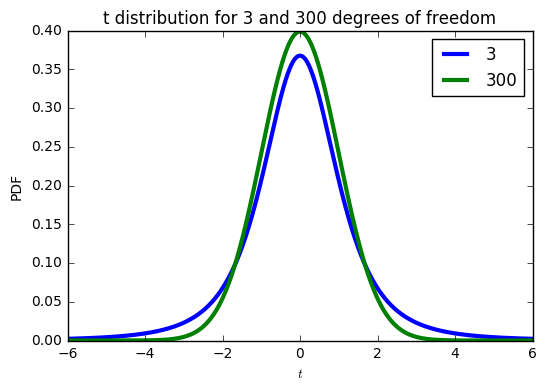

In [75]:
x = np.arange(-6,6,0.001)
plt.figure()
plt.plot(x,stats.t.pdf(x,3),lw=3)
plt.plot(x,stats.t.pdf(x,300),lw=3)
plt.legend(['3','300'])
plt.xlabel('$t$')
plt.ylabel('PDF')
plt.title('t distribution for 3 and 300 degrees of freedom')

The t distribution has a narrower distribution for many degrees of freedom. This is because with more samples, the sample mean gets closer to the true mean. There will be less spread in $\bar{x}-\mu$, and therefore also less spread in the value of $t$.

We can define $t_{1-\alpha, \nu}$ as the value of $t$ where a fraction $1-\alpha$ of the entire distribution is less than $t_{1-\alpha, \nu}$. Again, $\nu$ represents the degrees of freedom $N-1$ and determines the kurtosis of the distribution. For $\alpha$ = 0.025, 95% of the distribution falls between $t_{0.975,\nu}$ and -$t_{0.975,\nu}$.

#### Confidence intervals for the mean

If many groups of $N$ samples are taken from the same normally distributed parent population, a fraction 1-$\alpha$ of the sample means will fall in within the confidence intervals

$ \bar{x} - t_{1-\alpha} \frac{S} {\sqrt{N}} < \mu <  \bar{x} + t_{1-\alpha} {\frac{S} {\sqrt{N}}} $.

For a given group of $N$ samples and $\alpha$ = 0.025, this interval means that there is a 95% chance that the true mean falls within these values, assuming that the parent population is normally distributed.

This interval does _not_ describe the spread of the data, or where 95% of the samples fall. The spread is determined by the standard deviation. 

For $\alpha$ = 0.025, these values represent the 95% confidence intervals. The use of 95% confidence intervals is common, but there is no reason that this should necessarily be a cut-off. We can never be 100% certain that the true mean falls within a certain interval, but we want to be pretty certain.

#### Exercise

You are calibrating a nitrate sensor with bottle samples. The sensor has less accuracy than the bottle samples, but you are only able to collect a handful of discrete samples. You obtain differences $\Delta$NO$_3^-$ of 3.25, 0.43, -0.17 and 3.89 $\mu$M. Calculate the sample mean, and the 95% confidence intervals for the mean, assuming that the instrument error is normally distributed.

### Confidence intervals for variance
Describes the how well you know the true variance.

Calculating the confidence intervals for variance:
### $ \frac{(N -1) S^2}{\chi^2 _{\alpha}} < \sigma^2 <  \frac{(N -1) S^2}{\chi^2 _{1 - \alpha}} $ ###

Values are not symetric
### $ \chi^2_\alpha \ne \chi^2_{1-\alpha} $ ###

#### Exercise

Calculate the 95% confidence intervals for the standard deviation 

### Python - Tutorials
<img src='images/python_stack.png' width='600'>
Source: T. Connolly

__The python stack.__

Packages are collections of python code
Numpy - Numerical computing
SciPy - Stats, timeseries 
Matplotlib - Plotting and figure making
Other Packages:
   * Pandas: Data anlysis
   * Basemap: Map making working with geodata
   * xarray: 3D data

in bash: 'python' 'ipython' 

[Bash methods](https://ss64.com/bash/) - Note: Not all will work in Git-Bash

Common commands:

* ls - list files and directories from current 
* cd - change directory
* pwd - list the present working directory
* cp - copy a file to another locations ex cp data.txt documents , would copy a file in the current 
* mkdir - make a new directory
* .. - the parent directory